  ### Model of Net Production (NETPROD)
  See pg. 170 of Odum and Odum 2000

  Net production is the difference between gross production and consumption. For example, primary production accumulates biomass and some of that biomass is utilized for respiration or by secondary consumption. In the system diagram below, Q is the biomass accounting for net production.

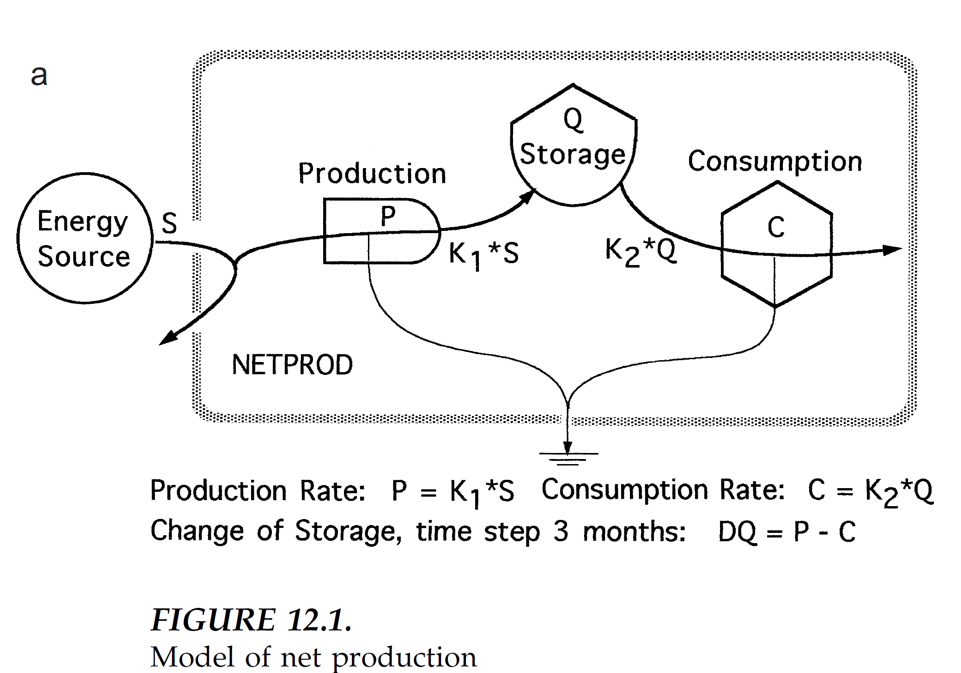

### Using step-wise changes in solar input
Odum and Odum's basic program used four discrete values of solar input (to represent seasonality). The figure of S vs time shows something more like a linear interpolation. In the implmentation shown below, the step-wise approach is maintained. Later, a linear interpolation approach will be used.

(0.0, 1000.0)

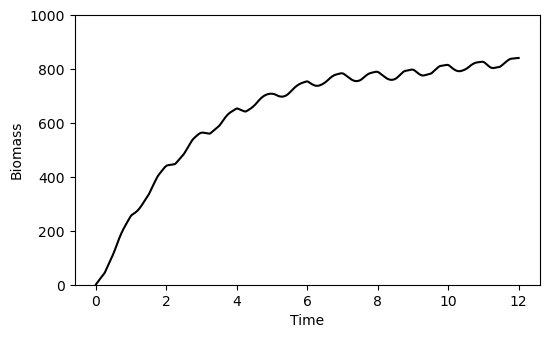

In [38]:
# import statements
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# set global constants
K1, K2 = 0.0225, 0.09 # per quarter year, Odum simulated time steps of 3 months
K1, K2 = K1*4, K2*4 # Convert to per year
Q_init = 1
t_end = 12
# set up the derivative function
def NETPROD(t, Q):
    '''t in years, Q in g/m2'''
    if t%1 < 0.25: # Winter
        S = 2000
    elif t%1 < 0.5: # Spring
        S = 3500
    elif t%1 < 0.75: # Summer
        S = 4500
    else:           # Fall
        S = 3500
    P = K1*S
    C = K2*Q
    dQ = P - C
    return dQ
# run the ODE solver
t_arr = np.linspace(0,t_end,400)
soln = solve_ivp(NETPROD, (0, t_end), [Q_init], t_eval=t_arr ,dense_output=True, method='RK23')
# graph the biomass vs time
fig, ax = plt.subplots(1,1, figsize=(6,3.5))
ax.plot(t_arr, soln.sol(t_arr)[0], 'k-', label='Q')
ax.set_xlabel("Time")
ax.set_ylabel("Biomass")
ax.set_ylim(0,1000)

  ### Linear interpolation of S
  The above simulation shows some numerical issues related to the step-wise changes in S. It is numerically easier and probably more physically realistic to smooth out the variation in S. This approach is applied below.

(0.0, 1000.0)

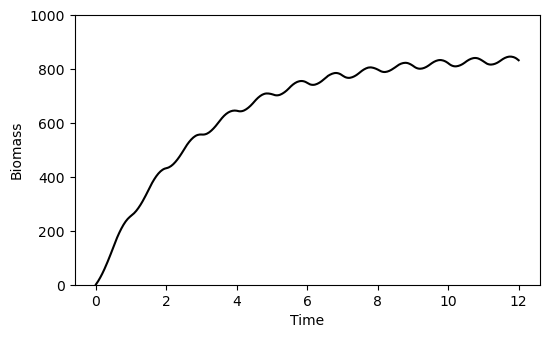

In [40]:
# import statements
import math as m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
# set global constants
K1, K2 = 0.0225, 0.09 # per quarter year, Odum simulated time steps of 3 months
K1, K2 = K1*4, K2*4 # Convert to per year
Q_init = 1
t_end = 12
# set up the derivative function
def NETPROD(t, Q):
    '''t in years, Q in g/m2'''
    S = np.interp(t, [0, 0.25, 0.5, 0.75, 1.0], [2000, 3500, 4500, 3500, 2000], period = 1)
    P = K1*S
    C = K2*Q
    dQ = P - C
    return dQ
# run the ODE solver
t_arr = np.linspace(0,t_end,400)
soln = solve_ivp(NETPROD, (0, t_end), [Q_init], t_eval=t_arr ,dense_output=True, method='LSODA')
# graph the biomass vs time
fig, ax = plt.subplots(1,1, figsize=(6,3.5))
ax.plot(t_arr, soln.sol(t_arr)[0], 'k-', label='Q')
ax.set_xlabel("Time")
ax.set_ylabel("Biomass")
ax.set_ylim(0,1000)